<a href="https://colab.research.google.com/github/RojaCM/MACHINE-LEARNING-ROJA/blob/main/MLR%2BRFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Housing.csv to Housing.csv


In [3]:
df=pd.read_csv('Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df1=df.copy()

In [7]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [21]:
var=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df2=df1.copy()

In [33]:
df2[var]=df2[var].apply(lambda x:x.map({'yes':1,'no':0}))

In [34]:
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [35]:
dummy=pd.get_dummies(df2['furnishingstatus'],drop_first=True)
df3=df2.copy()

In [36]:
dummy

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [37]:
housing=pd.concat([df2,dummy],axis=1)

In [39]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [40]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [41]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [42]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split


In [48]:
df_train,df_test=train_test_split(housing,train_size=0.7,random_state=100)

In [49]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [50]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [51]:
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


Rescaling the Features
We will use MinMax scaling.

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [53]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

housing[num_vars]=scaler.fit_transform(housing[num_vars])

In [55]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0


In [56]:
#Dividing into X and Y sets for the model building
X=housing.drop('price',axis=1)
Y=housing[['price']]


In [58]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1,0,1,0,0,0.666667,0,0,1
541,0.051546,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,1,0
542,0.135395,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0,1
543,0.086598,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,0,0


In [59]:
Y

,price
0,1.000000
1,0.909091
2,0.909091
3,0.906061
4,0.836364
...,...
540,0.006061
541,0.001485
542,0.000000
543,0.000000


Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)mm

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
lr=LinearRegression()
lr.fit(X,Y)

LinearRegression()

In [66]:
rfe = RFE(lr,n_features_to_select=10)
rfe = rfe.fit(X,Y)

In [67]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False])

In [68]:
rfe.ranking_

array([1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 2])

In [71]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', False, 3),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [73]:
col=X.columns[rfe.support_]

In [74]:
X.columns[~rfe.support_]

Index(['guestroom', 'semi-furnished', 'unfurnished'], dtype='object')

In [79]:
#Building model using statsmodel, for the detailed statistics
import statsmodels.api as sm

In [76]:
X_rfe=X[col]

In [77]:
X_rfe

,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea
0,0.396564,0.6,0.333333,0.666667,1,0,0,1,0.666667,1
1,0.502405,0.6,1.000000,1.000000,1,0,0,1,1.000000,0
2,0.571134,0.4,0.333333,0.333333,1,1,0,0,0.666667,1
3,0.402062,0.6,0.333333,0.333333,1,1,0,1,1.000000,1
4,0.396564,0.6,0.000000,0.333333,1,1,0,1,0.666667,0
...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1,1,0,0,0.666667,0
541,0.051546,0.4,0.000000,0.000000,0,0,0,0,0.000000,0
542,0.135395,0.2,0.000000,0.000000,1,0,0,0,0.000000,0
543,0.086598,0.4,0.000000,0.000000,0,0,0,0,0.000000,0


In [80]:
X_rfe=sm.add_constant(X_rfe)

In [81]:
X_rfe

,const,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea
0,1.0,0.396564,0.6,0.333333,0.666667,1,0,0,1,0.666667,1
1,1.0,0.502405,0.6,1.000000,1.000000,1,0,0,1,1.000000,0
2,1.0,0.571134,0.4,0.333333,0.333333,1,1,0,0,0.666667,1
3,1.0,0.402062,0.6,0.333333,0.333333,1,1,0,1,1.000000,1
4,1.0,0.396564,0.6,0.000000,0.333333,1,1,0,1,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,0.092784,0.2,0.000000,0.000000,1,1,0,0,0.666667,0
541,1.0,0.051546,0.4,0.000000,0.000000,0,0,0,0,0.000000,0
542,1.0,0.135395,0.2,0.000000,0.000000,1,0,0,0,0.000000,0
543,1.0,0.086598,0.4,0.000000,0.000000,0,0,0,0,0.000000,0


In [82]:
lm1=sm.OLS(Y,X_rfe).fit()

In [83]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     108.3
Date:                Thu, 31 Mar 2022   Prob (F-statistic):          1.56e-121
Time:                        18:11:36   Log-Likelihood:                 521.23
No. Observations:                 545   AIC:                            -1020.
Df Residuals:                     534   BIC:                            -973.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0038      0.016     -0.240      0.811      -0.035       0.027
area                0.3191      0.031     10.319      0.000       0.258       0.380
bedrooms            0.0540      0.032      1.694      0.091      -0.009       0.117
bathrooms           0.2643      0.027      9.712      0.000       0.211       0.318
stories             0.1212      0.017      7.172      0.000       0.088       0.154
mainroad            0.0414      0.012      3.322      0.001       0.017       0.066
basement            0.0411      0.009      4.535      0.000       0.023       0.059
hotwaterheating     0.0778      0.020      3.969      0.000       0.039       0.116
airconditioning     0.0779      0.009      8.234      0.000       0.059       0.096
parking             0.0759      0.015      4.944      0.000       0.046       0.106
prefarea            0.0580      0.010      5.705      0.000       0.038       0.078
==============================================================================
Omnibus:                       89.605   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.288
Skew:                           0.837   Prob(JB):                     7.28e-50
Kurtosis:                       5.677   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#Rebuilding the model without bedrooms
x_rfe_new=X_rfe.drop(['bedrooms'],axis=1)

In [85]:
x_rfe_new

,const,area,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea
0,1.0,0.396564,0.333333,0.666667,1,0,0,1,0.666667,1
1,1.0,0.502405,1.000000,1.000000,1,0,0,1,1.000000,0
2,1.0,0.571134,0.333333,0.333333,1,1,0,0,0.666667,1
3,1.0,0.402062,0.333333,0.333333,1,1,0,1,1.000000,1
4,1.0,0.396564,0.000000,0.333333,1,1,0,1,0.666667,0
...,...,...,...,...,...,...,...,...,...,...
540,1.0,0.092784,0.000000,0.000000,1,1,0,0,0.666667,0
541,1.0,0.051546,0.000000,0.000000,0,0,0,0,0.000000,0
542,1.0,0.135395,0.000000,0.000000,1,0,0,0,0.000000,0
543,1.0,0.086598,0.000000,0.000000,0,0,0,0,0.000000,0


In [86]:
lm2=sm.OLS(Y,x_rfe_new).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     119.6
Date:                Thu, 31 Mar 2022   Prob (F-statistic):          5.74e-122
Time:                        18:17:54   Log-Likelihood:                 519.77
No. Observations:                 545   AIC:                            -1020.
Df Residuals:                     535   BIC:                            -976.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0136      0.012      1.129      0.259      -0.010       0.037
area                0.3232      0.031     10.468      0.000       0.263       0.384
bathrooms           0.2747      0.027     10.340      0.000       0.222       0.327
stories             0.1312      0.016      8.287      0.000       0.100       0.162
mainroad            0.0388      0.012      3.136      0.002       0.015       0.063
basement            0.0433      0.009      4.820      0.000       0.026       0.061
hotwaterheating     0.0785      0.020      3.999      0.000       0.040       0.117
airconditioning     0.0777      0.009      8.201      0.000       0.059       0.096
parking             0.0779      0.015      5.078      0.000       0.048       0.108
prefarea            0.0583      0.010      5.730      0.000       0.038       0.078
==============================================================================
Omnibus:                       94.725   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.460
Skew:                           0.870   Prob(JB):                     1.84e-54
Kurtosis:                       5.805   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# Calculate the VIFs for the new model
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
x_new=x_rfe_new
vif['features']=x_new.columns
vif['vif']=[variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)

In [99]:
vif

,features,vif
0,const,8.95
1,area,1.30
3,stories,1.29
2,bathrooms,1.22
7,airconditioning,1.19
8,parking,1.19
4,mainroad,1.15
9,prefarea,1.15
5,basement,1.13
6,hotwaterheating,1.04


In [100]:
[variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]

[8.954389843471677,
 1.303228082525871,
 1.2160410344126547,
 1.2884306098540481,
 1.1450362513246024,
 1.1307228267897762,
 1.0377031943715291,
 1.1939718305379776,
 1.191833894900286,
 1.1452484361141706]

In [96]:
x_new.values

array([[1.        , 0.39656357, 0.33333333, ..., 1.        , 0.66666667,
        1.        ],
       [1.        , 0.5024055 , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 0.57113402, 0.33333333, ..., 0.        , 0.66666667,
        1.        ],
       ...,
       [1.        , 0.13539519, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.08659794, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.15120275, 0.        , ..., 0.        , 0.        ,
        0.        ]])

Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [115]:
y_pred=lm2.predict(x_new)

In [120]:
y=housing['price']

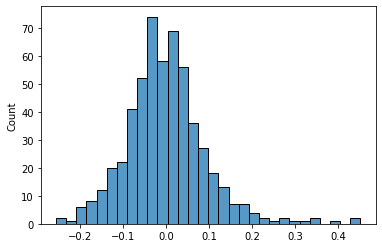

In [121]:
sns.histplot(y-y_pred)

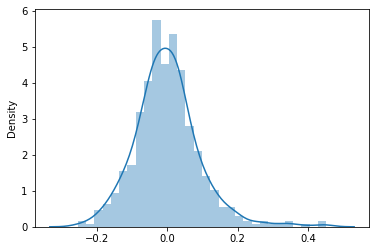

In [122]:
sns.distplot(y-y_pred)

Making Predictions
Applying the scaling on the test sets

In [123]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [129]:
#Dividing into X_test and y_test
x_test1=df_test.drop(['price'],axis=1)
y_test=df_test['price']

In [130]:
x_test1=x_test1[x_new.columns[1:]]

In [131]:
x_test1

,area,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea
265,0.084536,0.000000,0.333333,1,0,0,0,0.000000,1
54,0.298969,0.333333,0.333333,1,0,0,1,0.333333,0
171,0.592371,0.000000,0.000000,1,0,0,0,0.333333,1
244,0.252234,0.000000,0.333333,1,1,0,0,0.000000,1
268,0.226804,0.000000,0.333333,1,0,0,1,0.000000,0
...,...,...,...,...,...,...,...,...,...
413,0.020619,0.333333,0.333333,1,1,0,0,0.000000,1
191,0.621993,0.000000,0.333333,1,1,0,0,0.000000,0
310,0.297938,0.000000,0.000000,1,1,0,0,0.000000,0
46,0.298969,0.333333,1.000000,1,0,0,1,0.333333,0


In [127]:
x_test1=scaler.transform(x_test1)

Index(['area', 'bathrooms', 'stories', 'mainroad', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [134]:
x_test=sm.add_constant(x_test1)

In [140]:
ly_pred1=lm2.predict(x_test)

In [141]:
from sklearn.metrics import r2_score

r2_score(y,y_pred)

0.6679364670365553

In [143]:
r2_score(y_test,ly_pred1)

0.6757201627867582

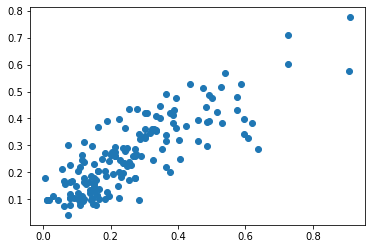

In [145]:
plt.scatter(y_test,ly_pred1)